# Predicting Machines Failure

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.

The dataset consists of 10 000 data points stored as rows with 14 features in columns

- UID: unique identifier ranging from 1 to 10000
productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
- air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
- process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
- torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
- tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

## 1. Reading dataset and exploring it

In [1]:
# Importing libs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mouting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Saving the datase in the 'df' variable
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Scientia/Clientes/Dummy/Dummy/predictive_maintenance.csv')

In [4]:
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [5]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

Features are on the right type.

In [6]:
df.shape

(10000, 10)

We have 10,000 rows and 10 columns.

In [7]:
df.size

100000

There are 100,000 values.

In [8]:
for i in df:
  print(df[i].value_counts())
  print("---" * 20)

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: UDI, Length: 10000, dtype: int64
------------------------------------------------------------
M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: Product ID, Length: 10000, dtype: int64
------------------------------------------------------------
L    6000
M    2997
H    1003
Name: Type, dtype: int64
------------------------------------------------------------
300.7    279
298.9    231
297.4    230
300.5    229
298.8    227
        ... 
304.4      7
296.0      6
295.4      3
295.3      3
304.5      1
Name: Air temperature [K], Length: 93, dtype: int64
------------------------------------------------------------
310.6    317
310.8    273
310.7    266
308.6    265
310.5    263
        ... 
306.9      4
313.7      4
305.8      3
305.7      2
313.8      2
Name: Process temperature

In [9]:
erroneous_targets1 = df[(df['Target'] == 1) & (df['Failure Type'] == 'No Failure')]
erroneous_targets1

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
1437  1438     H30851    H                298.8                    309.9   
2749  2750     M17609    M                299.7                    309.2   
4044  4045     M18904    M                301.9                    310.9   
4684  4685     M19544    M                303.6                    311.8   
5536  5537     M20396    M                302.3                    311.8   
5941  5942     L53121    L                300.6                    310.7   
6478  6479     L53658    L                300.5                    309.8   
8506  8507     L55686    L                298.4                    309.6   
9015  9016     L56195    L                297.2                    308.1   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
1437                    1439         45.2               40       1   
2749                    1685         28.9              179       1   
4044                    1419         47.7               20       1   
4684                    1421         44.8              101       1   
5536                    1363         54.0              119       1   
5941                    1438         48.5               78       1   
6478                    1663         29.1              145       1   
8506                    1710         27.3              163       1   
9015                    1431         49.7              210       1   

     Failure Type  
1437   No Failure  
2749   No Failure  
4044   No Failure  
4684   No Failure  
5536   No Failure  
5941   No Failure  
6478   No Failure  
8506   No Failure  
9015   No Failure

In [10]:
erroneous_targets2 = df[(df['Target'] == 0) &
                        ((df['Failure Type'] == 'Heat Dissipation Failure') |
                        (df['Failure Type'] == 'Tool Wear Failure') |
                        (df['Failure Type'] == 'Overstrain Failure') |
                        (df['Failure Type'] == 'Power Failure'))
                        ]
erroneous_targets2

Empty DataFrame
Columns: [UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Target, Failure Type]
Index: []

We have data that was mislabeled as Failure, but they didn't fail, so we'll drop them.

In [11]:
df = df.drop(erroneous_targets1.index)

In [12]:
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[9991 rows x 10 columns]

### 1.1 Removing Random Failures because they can't be predicted

In [13]:
df = df[df['Failure Type'] != 'Random Failures']

### 1.2 Checking missing values

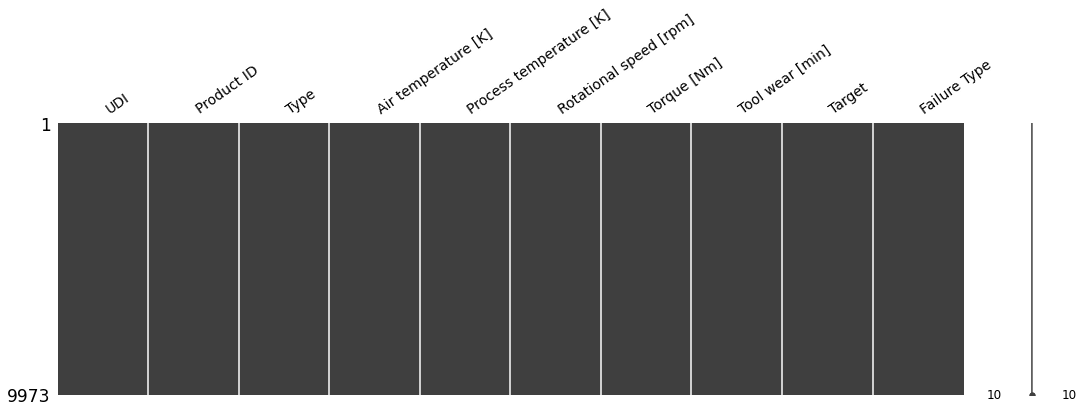

In [14]:
import missingno as msno
msno.matrix(df, figsize=(18,5), fontsize=14);
plt.xticks(rotation=35);

In [15]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

We don't have missing values.

## 2. Feature Engineering

### 2.1 Converting Kelvin to Celsius using the formula: Celsius  = Kelvin - 273.15

In [16]:
df['Air temperature [C]'] = df['Air temperature [K]'] - 273.15
df['Process temperature [C]'] = df['Process temperature [K]'] - 273.15

### 2.2 Creating a feature called Temperature_diff to calculate the difference between Process temperature and Air temperature

In [17]:
df['Temperature_diff'] = df['Process temperature [C]'] - df['Air temperature [C]']

### 2.3 Dropping Kelvin features

In [18]:
df = df.drop(columns={'Air temperature [K]','Process temperature [K]'})

In [19]:
df

UDI Product ID Type  Rotational speed [rpm]  Torque [Nm]  \
0         1     M14860    M                    1551         42.8   
1         2     L47181    L                    1408         46.3   
2         3     L47182    L                    1498         49.4   
3         4     L47183    L                    1433         39.5   
4         5     L47184    L                    1408         40.0   
...     ...        ...  ...                     ...          ...   
9995   9996     M24855    M                    1604         29.5   
9996   9997     H39410    H                    1632         31.8   
9997   9998     M24857    M                    1645         33.4   
9998   9999     H39412    H                    1408         48.5   
9999  10000     M24859    M                    1500         40.2   

      Tool wear [min]  Target Failure Type  Air temperature [C]  \
0                   0       0   No Failure                24.95   
1                   3       0   No Failure                25.05   
2                   5       0   No Failure                24.95   
3                   7       0   No Failure                25.05   
4                   9       0   No Failure                25.05   
...               ...     ...          ...                  ...   
9995               14       0   No Failure                25.65   
9996               17       0   No Failure                25.75   
9997               22       0   No Failure                25.85   
9998               25       0   No Failure                25.85   
9999               30       0   No Failure                25.85   

      Process temperature [C]  Temperature_diff  
0                       35.45              10.5  
1                       35.55              10.5  
2                       35.35              10.4  
3                       35.45              10.4  
4                       35.55              10.5  
...                       ...               ...  
9995                    35.25               9.6  
9996                    35.25               9.5  
9997                    35.45               9.6  
9998                    35.55               9.7  
9999                    35.55               9.7  

[9973 rows x 11 columns]

In [20]:
df.describe()

UDI  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  \
count   9973.000000             9973.000000  9973.000000      9973.000000   
mean    5000.770881             1538.893212    39.978993       107.921087   
std     2888.466894              179.412171     9.966805        63.649152   
min        1.000000             1168.000000     3.800000         0.000000   
25%     2499.000000             1423.000000    33.200000        53.000000   
50%     4998.000000             1503.000000    40.100000       108.000000   
75%     7504.000000             1612.000000    46.700000       162.000000   
max    10000.000000             2886.000000    76.600000       253.000000   

            Target  Air temperature [C]  Process temperature [C]  \
count  9973.000000          9973.000000              9973.000000   
mean      0.033089            26.853259                36.854031   
std       0.178879             2.000548                 1.483692   
min       0.000000            22.150000                32.550000   
25%       0.000000            25.150000                35.650000   
50%       0.000000            26.950000                36.950000   
75%       0.000000            28.350000                37.950000   
max       1.000000            31.350000                40.650000   

       Temperature_diff  
count       9973.000000  
mean          10.000772  
std            1.001423  
min            7.600000  
25%            9.300000  
50%            9.800000  
75%           11.000000  
max           12.100000

## 3. Handling outliers and EDA

### 3.1 Plotting distribution of values

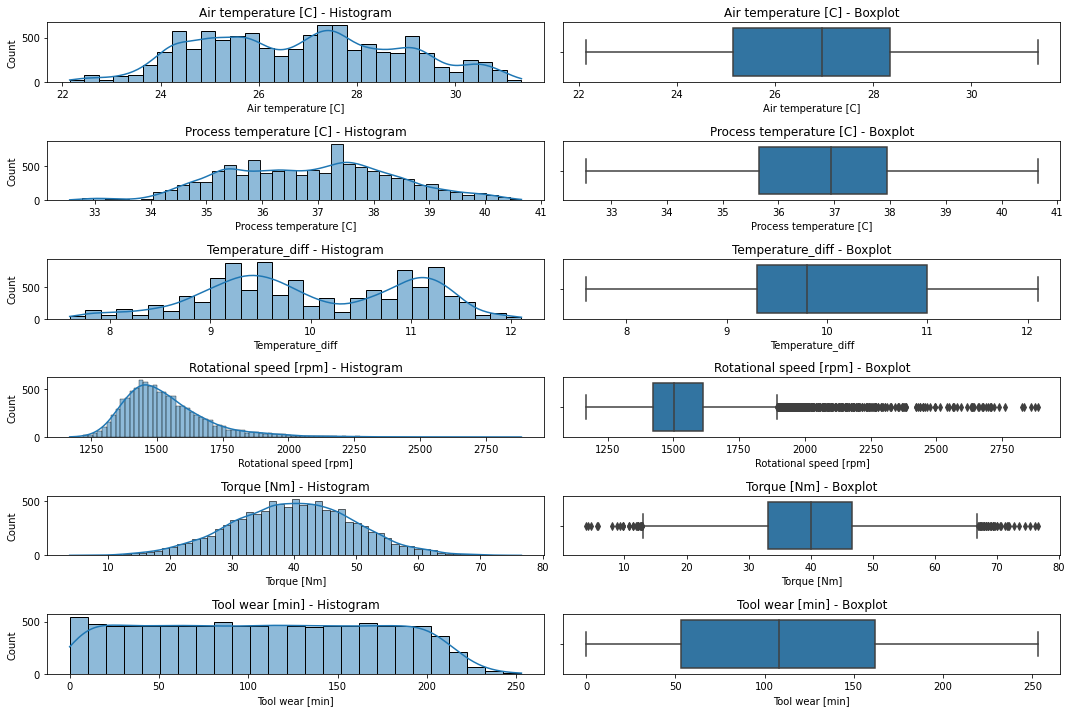

In [21]:
fig, ax = plt.subplots(6, 2, figsize=(15,10))

sns.histplot(data=df, x='Air temperature [C]', kde=True, ax=ax[0,0])
ax[0,0].set_title('Air temperature [C] - Histogram')
sns.boxplot(data=df, x='Air temperature [C]', ax=ax[0,1])
ax[0,1].set_title('Air temperature [C] - Boxplot')

sns.histplot(data=df, x='Process temperature [C]', kde=True, ax=ax[1,0])
ax[1,0].set_title('Process temperature [C] - Histogram')
sns.boxplot(data=df, x='Process temperature [C]', ax=ax[1,1])
ax[1,1].set_title('Process temperature [C] - Boxplot')

sns.histplot(data=df, x='Temperature_diff', kde=True, ax=ax[2,0])
ax[2,0].set_title('Temperature_diff - Histogram')
sns.boxplot(data=df, x='Temperature_diff', ax=ax[2,1])
ax[2,1].set_title('Temperature_diff - Boxplot')

sns.histplot(data=df, x='Rotational speed [rpm]', kde=True, ax=ax[3,0])
ax[3,0].set_title('Rotational speed [rpm] - Histogram')
sns.boxplot(data=df, x='Rotational speed [rpm]', ax=ax[3,1])
ax[3,1].set_title('Rotational speed [rpm] - Boxplot')

sns.histplot(data=df, x='Torque [Nm]', kde=True, ax=ax[4,0])
ax[4,0].set_title('Torque [Nm] - Histogram')
sns.boxplot(data=df, x='Torque [Nm]', ax=ax[4,1])
ax[4,1].set_title('Torque [Nm] - Boxplot')

sns.histplot(data=df, x='Tool wear [min]', kde=True, ax=ax[5,0])
ax[5,0].set_title('Tool wear [min] - Histogram')
sns.boxplot(data=df, x='Tool wear [min]', ax=ax[5,1])
ax[5,1].set_title('Tool wear [min] - Boxplot')

plt.tight_layout()
plt.show()

We have outliers in the features Rotational speed [rpm] and Torque [Nm].

### 3.2 Handling outliers

In [22]:
# Setting the quantiles

high = 0.95
low = 0.05

lower_rotational = df['Rotational speed [rpm]'].quantile(low)  
higher_rotational = df['Rotational speed [rpm]'].quantile(high)

lower_torque = df['Torque [Nm]'].quantile(low)
higher_torque = df['Torque [Nm]'].quantile(high)

print(f'Rotational Speed Higher Quantile value: {higher_rotational}')
print(f'Rotational Speed Lower Quantile value: {lower_rotational}')
print(f'Torque Higher Quantile value: {higher_torque}')
print(f'Torque Lower Quantile value: {lower_torque}')

Rotational Speed Higher Quantile value: 1869.0
Rotational Speed Lower Quantile value: 1332.0
Torque Higher Quantile value: 56.1
Torque Lower Quantile value: 23.46


In [23]:
# Replacing outliers with higher and lower values

df.loc[df['Rotational speed [rpm]'] < lower_rotational, 'Rotational speed [rpm]'] = lower_rotational
df.loc[df['Rotational speed [rpm]'] > higher_rotational, 'Rotational speed [rpm]'] = higher_rotational

df.loc[df['Torque [Nm]'] < lower_torque, 'Torque [Nm]'] = lower_torque
df.loc[df['Torque [Nm]'] > higher_torque, 'Torque [Nm]'] = higher_torque

### 3.3 EDA

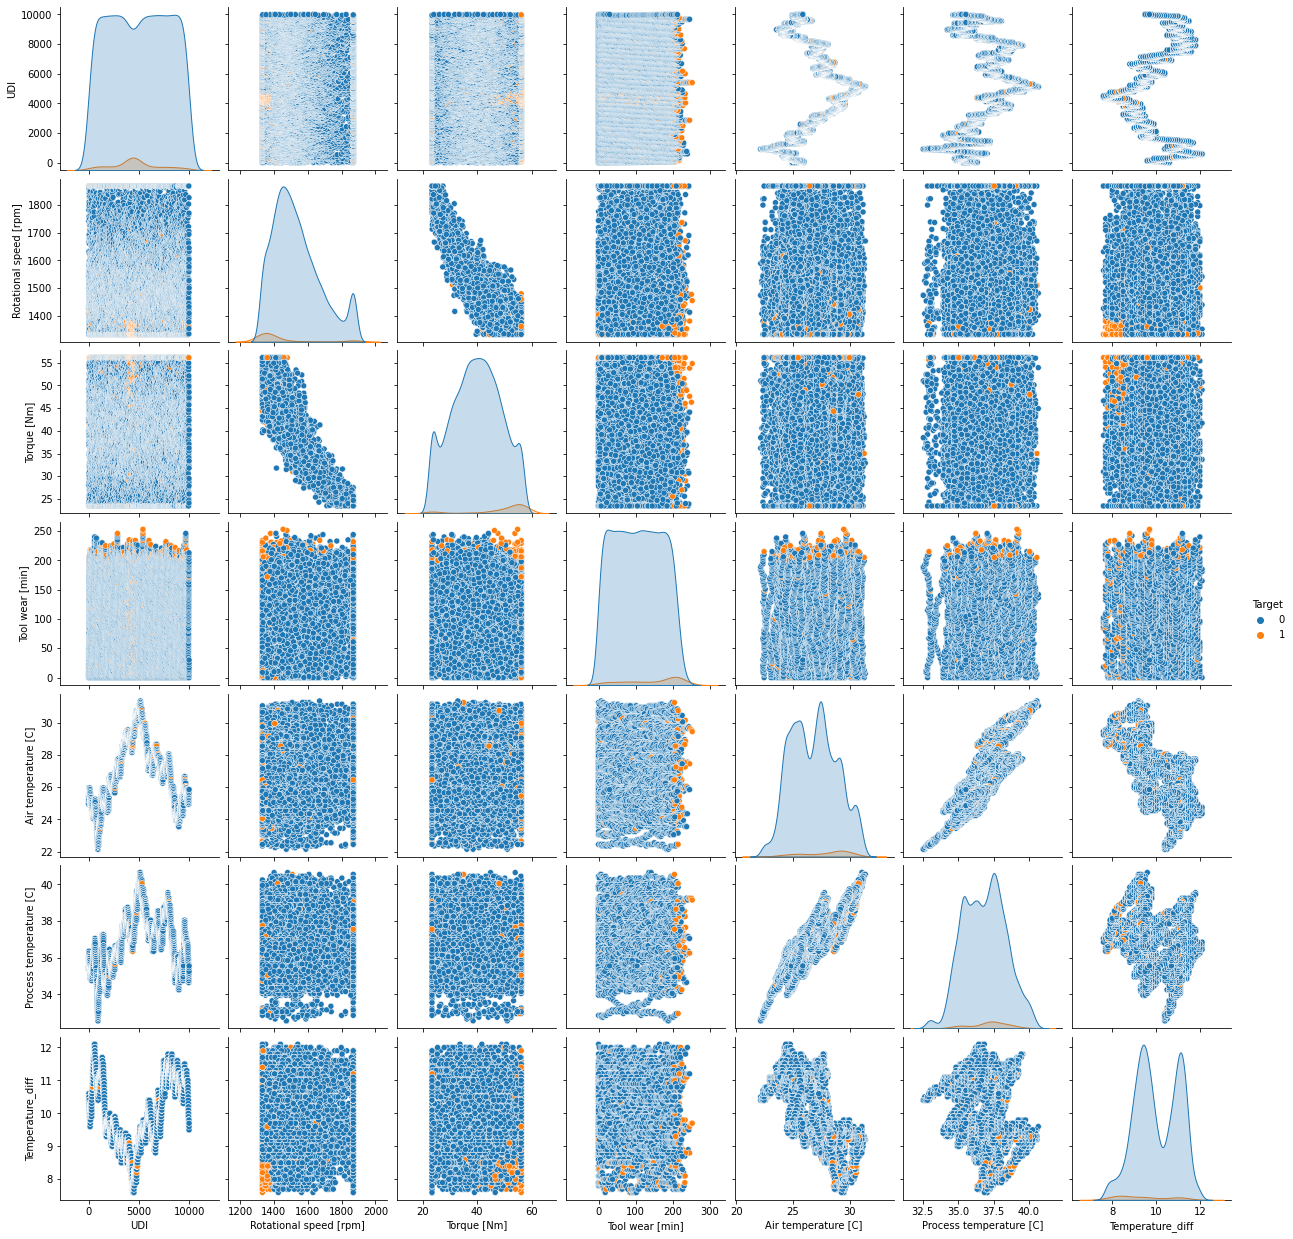

In [110]:
sns.pairplot(df, hue='Target')

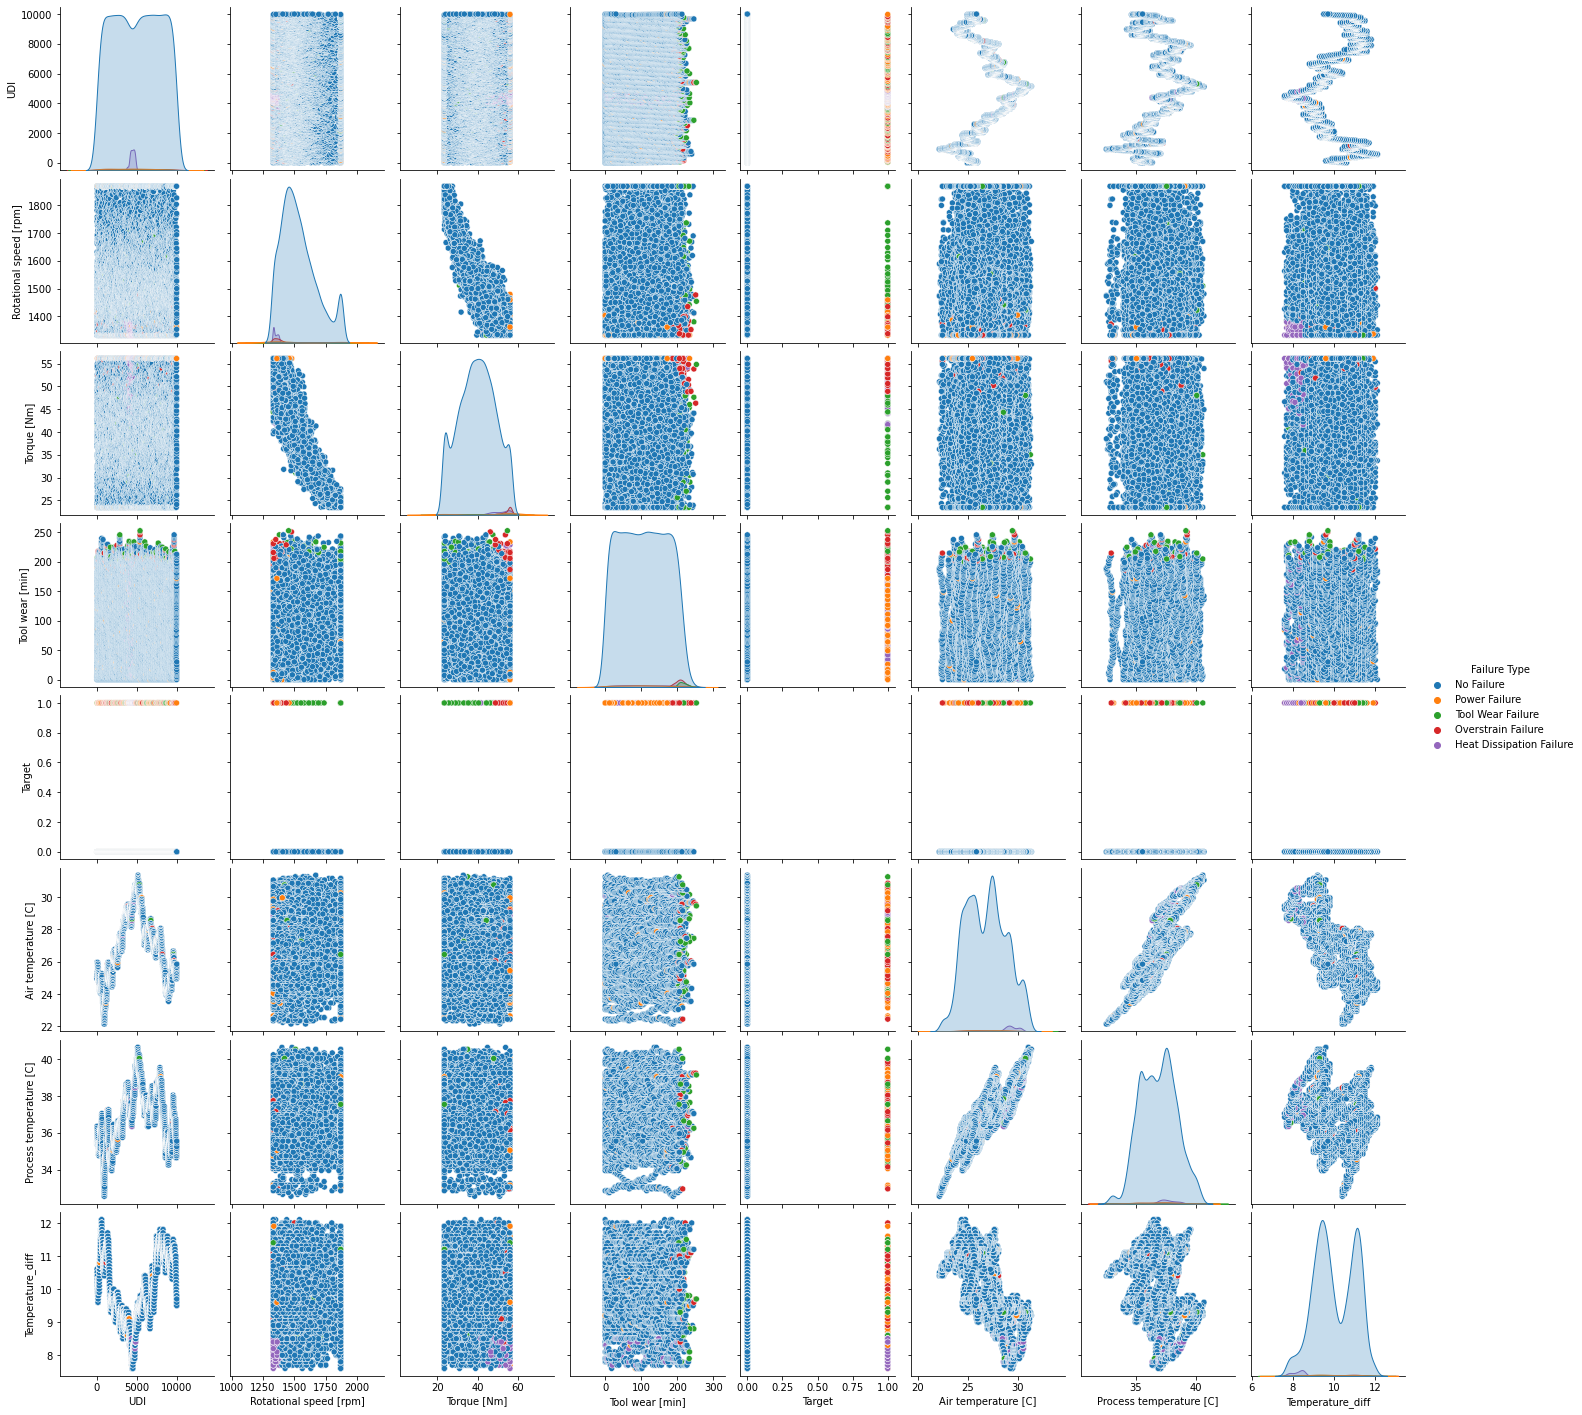

In [111]:
sns.pairplot(df, hue='Failure Type')

In [112]:
df_failure = df[df['Failure Type'] != 'No Failure']

In [113]:
df_failure

UDI Product ID Type  Rotational speed [rpm]  Torque [Nm]  \
50      51     L47230    L                    1869        23.46   
69      70     L47249    L                    1410        56.10   
77      78     L47257    L                    1455        41.30   
160    161     L47340    L                    1332        56.10   
161    162     L47341    L                    1412        52.30   
...    ...        ...  ...                     ...          ...   
9758  9759     L56938    L                    1869        23.46   
9764  9765     L56944    L                    1332        56.10   
9822  9823     L57002    L                    1360        56.10   
9830  9831     L57010    L                    1337        56.10   
9974  9975     L57154    L                    1361        56.10   

      Tool wear [min]  Target        Failure Type  Air temperature [C]  \
50                143       1       Power Failure                25.75   
69                191       1       Power Failure                25.75   
77                208       1   Tool Wear Failure                25.65   
160               216       1  Overstrain Failure                25.25   
161               218       1  Overstrain Failure                25.15   
...               ...     ...                 ...                  ...   
9758              218       1   Tool Wear Failure                25.45   
9764               12       1       Power Failure                25.35   
9822              187       1  Overstrain Failure                25.35   
9830              206       1  Overstrain Failure                25.15   
9974              172       1       Power Failure                25.45   

      Process temperature [C]  Temperature_diff  
50                      35.95              10.2  
69                      35.85              10.1  
77                      35.75              10.1  
160                     35.05               9.8  
161                     34.95               9.8  
...                       ...               ...  
9758                    36.65              11.2  
9764                    36.35              11.0  
9822                    36.25              10.9  
9830                    36.15              11.0  
9974                    35.05               9.6  

[330 rows x 11 columns]

In [114]:
df_failure['Target'].value_counts()

1    330
Name: Target, dtype: int64

In [115]:
df_failure = df_failure.drop(columns={'UDI','Product ID','Target'})

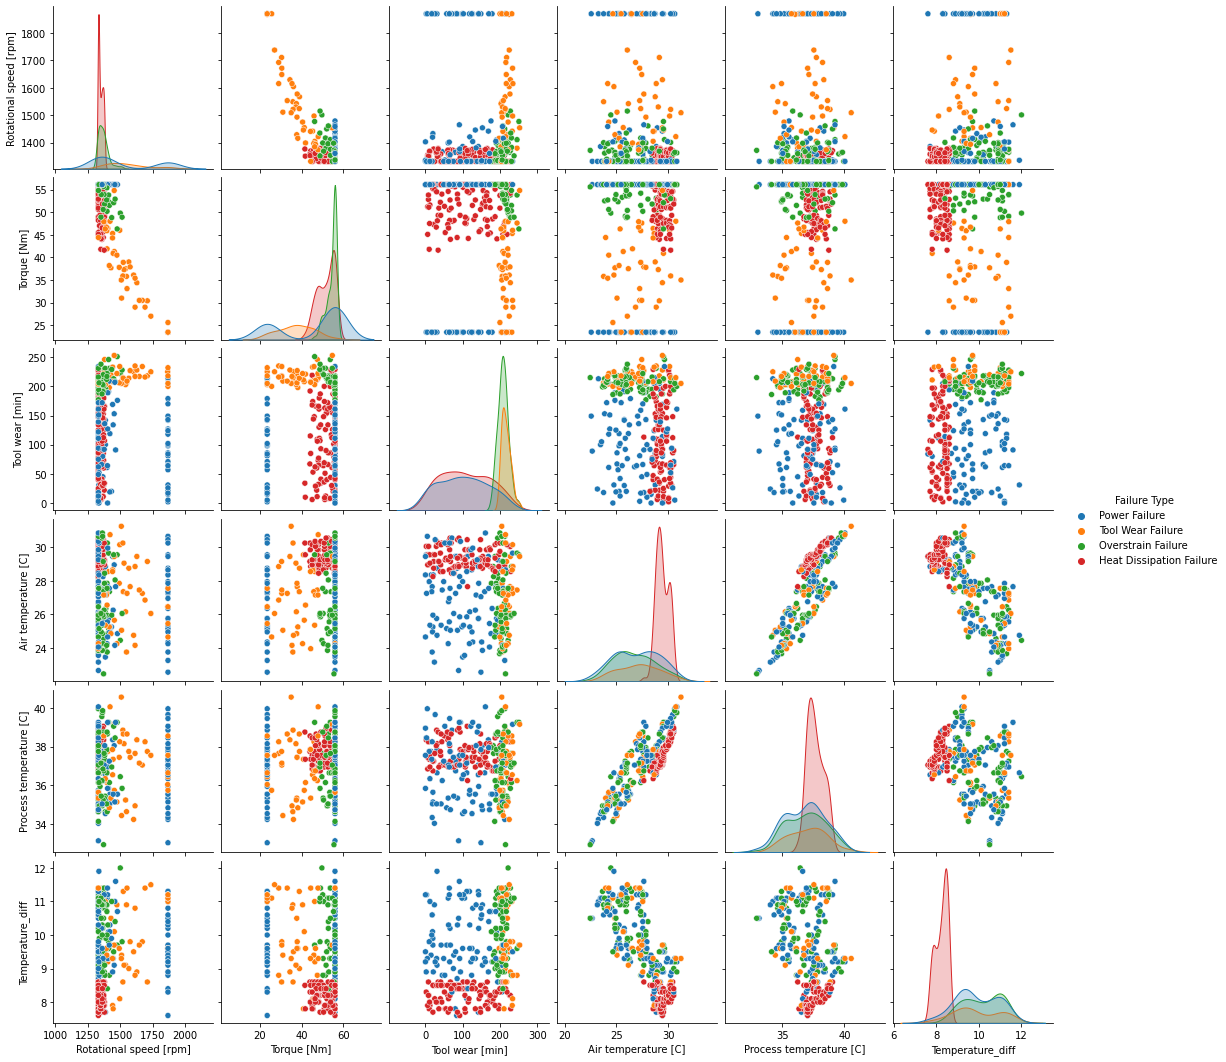

In [30]:
sns.pairplot(df_failure, hue='Failure Type')

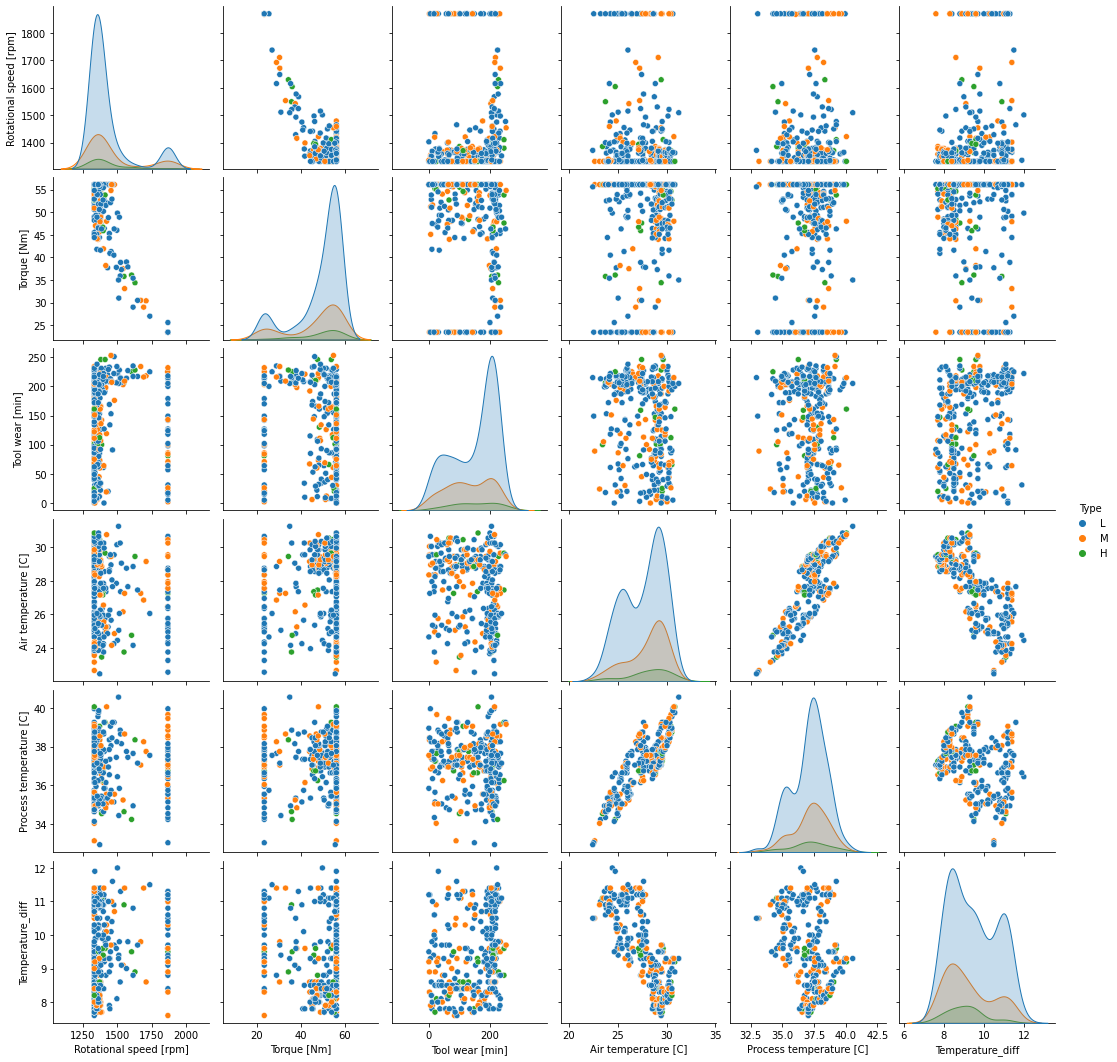

In [31]:
sns.pairplot(df_failure, hue='Type')

### Checking correlations

In [32]:
# LabelEncoding of categorical features on a copy of the dataset

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

train_le = df.copy()

cat_cols = train_le.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in cat_cols:
    train_le[col] = le.fit_transform(train_le[col])


# Scaling the numerical features using MinMaxScaler
num_cols = train_le.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()

train_le[num_cols] = scaler.fit_transform(train_le[num_cols])

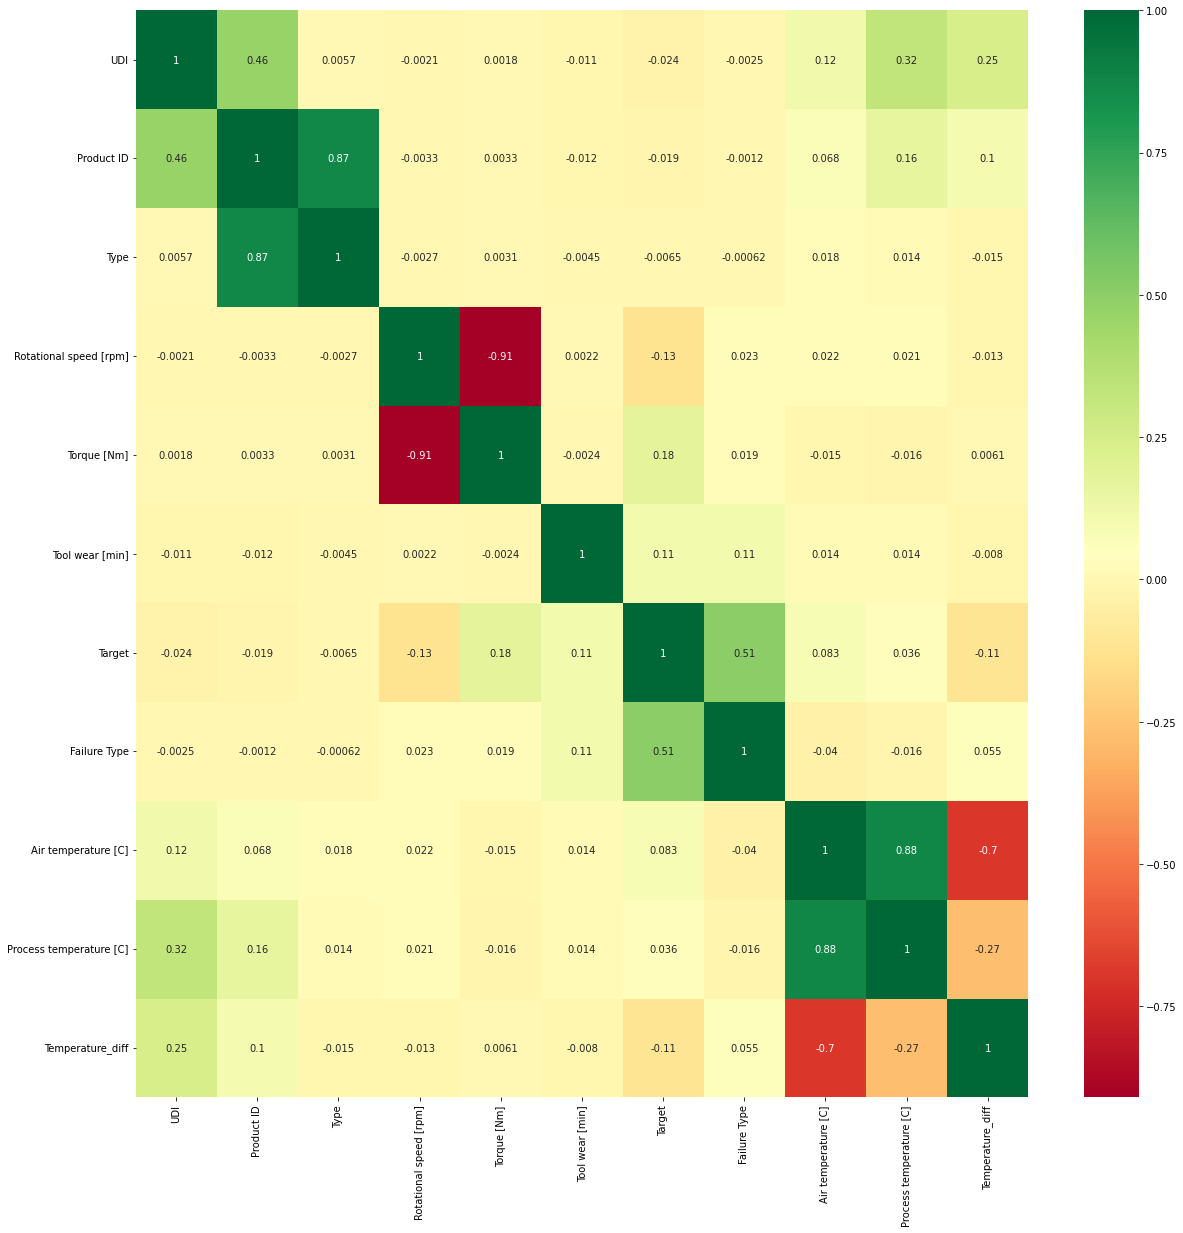

In [33]:
corrmat = train_le.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(train_le[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## 4. Feature Importance

In [55]:
# Dropping features that have no impact and Failure Type because it's similar to our label
X = df.drop(columns={'Target', 'Failure Type', 'UDI', 'Product ID'})
y = df['Target']

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler

numeric_values = list(X.select_dtypes(exclude=['object']).columns)
string_values = list(X.select_dtypes(include=['object']).columns)

preprocessor = ColumnTransformer(transformers=[
    ('cat', OrdinalEncoder(), string_values),
    ('num', MinMaxScaler(), numeric_values)
])

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=22)


pipe_fi = Pipeline(steps=[('preprocessor', preprocessor), ('clf', rfc)])
pipe_fi.fit(X,y)

feature_importances = rfc.feature_importances_

In [27]:
feature_names = [f"feature {i+1}" for i in range(X.shape[1])]

for i in range(len(feature_importances)):
    print(f"{feature_names[i]}: {feature_importances[i]}")

feature 1: 0.03131982144277488
feature 2: 0.1984075320852743
feature 3: 0.15430581324460782
feature 4: 0.21376778373855845
feature 5: 0.1078897971599263
feature 6: 0.09747504947483518
feature 7: 0.19683420285402314


In [28]:
X

Type  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  \
0       M                    1551         42.8                0   
1       L                    1408         46.3                3   
2       L                    1498         49.4                5   
3       L                    1433         39.5                7   
4       L                    1408         40.0                9   
...   ...                     ...          ...              ...   
9995    M                    1604         29.5               14   
9996    H                    1632         31.8               17   
9997    M                    1645         33.4               22   
9998    H                    1408         48.5               25   
9999    M                    1500         40.2               30   

      Air temperature [C]  Process temperature [C]  Temperature_diff  
0                   24.95                    35.45              10.5  
1                   25.05                    35.55              10.5  
2                   24.95                    35.35              10.4  
3                   25.05                    35.45              10.4  
4                   25.05                    35.55              10.5  
...                   ...                      ...               ...  
9995                25.65                    35.25               9.6  
9996                25.75                    35.25               9.5  
9997                25.85                    35.45               9.6  
9998                25.85                    35.55               9.7  
9999                25.85                    35.55               9.7  

[9973 rows x 7 columns]

The 'Type' feature has almost no impact, so we'll drop it and generate the updated preprocessor.

In [29]:
X = X.drop(columns={'Type'})

In [32]:
numeric_values = list(X.select_dtypes(exclude=['object']).columns)
string_values = list(X.select_dtypes(include=['object']).columns)

preprocessor = ColumnTransformer(transformers=[
    ('cat', OrdinalEncoder(), string_values),
    ('num', MinMaxScaler(), numeric_values)
])

In [33]:
print(preprocessor)

ColumnTransformer(transformers=[('cat', OrdinalEncoder(), []),
                                ('num', MinMaxScaler(),
                                 ['Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'Air temperature [C]',
                                  'Process temperature [C]',
                                  'Temperature_diff'])])


## 5. Cross-Validation comparing classification models on the dataset

We'll use precision as scoring because the dataset has class imbalance.

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

rs = 22

cl_models = [
    SVC(random_state=rs),
    KNeighborsClassifier(3),
    LogisticRegression(random_state=rs),
    DecisionTreeClassifier(random_state=rs),
    RandomForestClassifier(random_state=rs),
    AdaBoostClassifier(random_state=rs),
    GradientBoostingClassifier(random_state=rs),
    ExtraTreesClassifier(random_state=rs)
]

scalers = [
    StandardScaler(),
    MinMaxScaler()
]

for model in cl_models:
  for scaler in scalers:
    pipe = Pipeline(steps=[('prep', preprocessor), ("stdscaler", scaler), ("classifier", model)])

    # 10-Fold Cross-Validation
    scores = cross_val_score(pipe, X, y, cv=10, scoring='precision')

    # Scores
    print(f'Modelo: {model}. Scaler: {scaler}')
    print('Cross-validation scores:', scores)
    print('Mean cross-validation score:', scores.mean())
    print('-----' * 10)

Modelo: SVC(random_state=22). Scaler: StandardScaler()
Cross-validation scores: [0.         0.         1.         0.78571429 0.1420765  0.92857143
 1.         0.         0.         0.        ]
Mean cross-validation score: 0.38563622170179546
--------------------------------------------------
Modelo: SVC(random_state=22). Scaler: MinMaxScaler()
Cross-validation scores: [0.         0.         1.         0.78571429 0.17948718 0.92857143
 1.         1.         0.         0.        ]
Mean cross-validation score: 0.4893772893772894
--------------------------------------------------
Modelo: KNeighborsClassifier(n_neighbors=3). Scaler: StandardScaler()
Cross-validation scores: [0.72727273 0.22222222 0.11111111 0.5        0.16666667 0.4
 0.41666667 0.08108108 0.3        0.88888889]
Mean cross-validation score: 0.38139093639093635
--------------------------------------------------
Modelo: KNeighborsClassifier(n_neighbors=3). Scaler: MinMaxScaler()
Cross-validation scores: [0.72727273 0.25       

## 6. Best model and hyperparameters

GradientBoostingClassifier with MinMaxScaler has the best precision score. 

We'll use it and find its hyperparameters.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

In [36]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters
param_grid = {
    'gbc__n_estimators': [100, 300, 500],
    'gbc__max_depth': [3,5,7],
    'gbc__criterion':['friedman_mse','squared_error'],
}

gbc = GradientBoostingClassifier(random_state=rs)

# New Pipeline
pipe_GBC = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', MinMaxScaler()) ,('gbc', gbc)])

# GridSearch
grid_search = GridSearchCV(pipe_GBC, param_grid, cv=10, scoring='precision', verbose=2)
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Fitting the pipeline with the best hyperparameters
best_pipe_GBC = grid_search.best_estimator_
best_pipe_GBC.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END gbc__criterion=friedman_mse, gbc__max_depth=3, gbc__n_estimators=100; total time=   1.2s
[CV] END gbc__criterion=friedman_mse, gbc__max_depth=3, gbc__n_estimators=100; total time=   2.4s
[CV] END gbc__criterion=friedman_mse, gbc__max_depth=3, gbc__n_estimators=100; total time=   2.5s
[CV] END gbc__criterion=friedman_mse, gbc__max_depth=3, gbc__n_estimators=100; total time=   1.2s
[CV] END gbc__criterion=friedman_mse, gbc__max_depth=3, gbc__n_estimators=100; total time=   0.9s
[CV] END gbc__criterion=friedman_mse, gbc__max_depth=3, gbc__n_estimators=100; total time=   0.9s
[CV] END gbc__criterion=friedman_mse, gbc__max_depth=3, gbc__n_estimators=100; total time=   0.9s
[CV] END gbc__criterion=friedman_mse, gbc__max_depth=3, gbc__n_estimators=100; total time=   0.9s
[CV] END gbc__criterion=friedman_mse, gbc__max_depth=3, gbc__n_estimators=100; total time=   0.9s
[CV] END gbc__criterion=friedman_mse, gbc__max_depth=3,

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(), []),
                                                 ('num', MinMaxScaler(),
                                                  ['Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]',
                                                   'Air temperature [C]',
                                                   'Process temperature [C]',
                                                   'Temperature_diff'])])),
                ('scaler', MinMaxScaler()),
                ('gbc', GradientBoostingClassifier(random_state=22))])

In [37]:
print('Best estimator:', grid_search.best_estimator_)
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(), []),
                                                 ('num', MinMaxScaler(),
                                                  ['Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]',
                                                   'Air temperature [C]',
                                                   'Process temperature [C]',
                                                   'Temperature_diff'])])),
                ('scaler', MinMaxScaler()),
                ('gbc', GradientBoostingClassifier(random_state=22))])
Best parameters: {'gbc__criterion': 'friedman_mse', 'gbc__max_depth': 3, 'gbc__n_estimators': 100}
Best score: 0.8365363970394931


## 7. Applying best hyperparameters on GradientBoostingClassifier

Precision: 0.7636363636363637
ROCAUC score: 0.7565655170296696
Accuracy score: 0.9791499599037691
F1 score: 0.6176470588235293


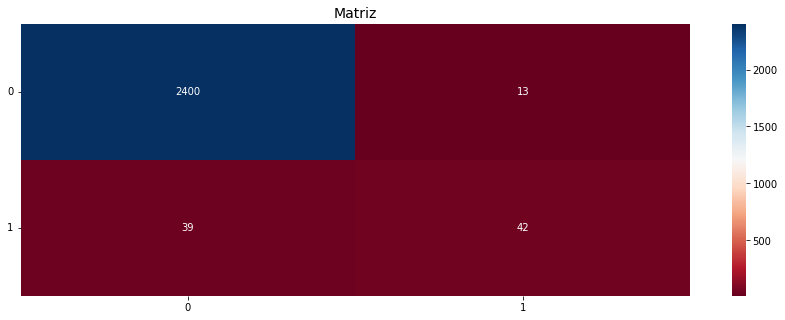

------------------------------------------------------------------------------------------


In [45]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score

gbc_model = GradientBoostingClassifier(criterion='friedman_mse', max_depth=3, n_estimators=100, random_state=rs)

pipe_GBC_F = Pipeline(steps=[('preprocessor', preprocessor),('svc', gbc_model)])
pipe_GBC_F.fit(X_train, y_train)

gbc_predict = pipe_GBC_F.predict(X_test)

roc_auc = roc_auc_score(y_test, gbc_predict)
accuracy = accuracy_score(y_test, gbc_predict)
f1 = f1_score(y_test, gbc_predict)

positive_class = 1

precision = precision_score(y_test, gbc_predict, pos_label=positive_class)

# Printing precision
print('Precision:', precision)

# Printing metrics
print('ROCAUC score:', roc_auc)
print('Accuracy score:', accuracy)
print('F1 score:', f1)

# Confusion matrix
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, gbc_predict)
plt.figure(figsize=(15,5))
sns.heatmap(conf,annot=True,fmt="d",cmap='RdBu')
plt.title('Matriz',fontsize=14)
plt.yticks(rotation =0)
plt.show()
print("---"*30)

As accuracy is not the best metric to use in a imbalanced dataset and we used precision, we had a great score of 76.36%.

## 8. Predicting new values using our fine-tuned model with pipeline

In [46]:
df_predict = df.copy()

In [47]:
df_predict = df_predict.drop(columns={'UDI','Product ID','Failure Type'})

In [48]:
gbc_predict_f = pipe_GBC_F.predict(df_predict)

In [49]:
gbc_predict_f

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
df_predict

Type  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0       M                    1551         42.8                0       0   
1       L                    1408         46.3                3       0   
2       L                    1498         49.4                5       0   
3       L                    1433         39.5                7       0   
4       L                    1408         40.0                9       0   
...   ...                     ...          ...              ...     ...   
9995    M                    1604         29.5               14       0   
9996    H                    1632         31.8               17       0   
9997    M                    1645         33.4               22       0   
9998    H                    1408         48.5               25       0   
9999    M                    1500         40.2               30       0   

      Air temperature [C]  Process temperature [C]  Temperature_diff  
0                   24.95                    35.45              10.5  
1                   25.05                    35.55              10.5  
2                   24.95                    35.35              10.4  
3                   25.05                    35.45              10.4  
4                   25.05                    35.55              10.5  
...                   ...                      ...               ...  
9995                25.65                    35.25               9.6  
9996                25.75                    35.25               9.5  
9997                25.85                    35.45               9.6  
9998                25.85                    35.55               9.7  
9999                25.85                    35.55               9.7  

[9973 rows x 8 columns]

In [52]:
df_predict['Predicted'] = gbc_predict_f

In [53]:
df_predict['Predicted'].value_counts()

0    9752
1     221
Name: Predicted, dtype: int64